In [1]:
from google.colab import files

# **Data Preparation**

# Load the renewable energy production data

In [2]:
uploaded = files.upload()

Saving courbes-de-production-mensuelles-eolien-solaire-complement-de-remuneration.csv to courbes-de-production-mensuelles-eolien-solaire-complement-de-remuneration.csv


## **Display the first few rows of the DataFrame**


In [3]:
import pandas as pd

file_name = 'courbes-de-production-mensuelles-eolien-solaire-complement-de-remuneration.csv'

# Read the CSV file into a DataFrame
df = pd.read_csv(file_name)

# Display the first few rows of the DataFrame
df.head()

,Date and Hour,Date,StartHour,EndHour,Source,Production,dayOfYear,dayName,monthName
0,2020-07-22 20:00:00+02:00,2020-07-22,20:00:00,21:00:00,Solar,244.0,204,Wednesday,July
1,2020-07-23 07:00:00+02:00,2020-07-23,07:00:00,08:00:00,Solar,223.0,205,Thursday,July
2,2020-07-23 16:00:00+02:00,2020-07-23,16:00:00,17:00:00,Solar,2517.0,205,Thursday,July
3,2020-07-23 19:00:00+02:00,2020-07-23,19:00:00,20:00:00,Solar,658.0,205,Thursday,July
4,2020-07-23 23:00:00+02:00,2020-07-23,23:00:00,24:00:00,Solar,0.0,205,Thursday,July


#**Information about the dataset**

In [4]:
# Getting basic information about the dataset
print("Dataset Information:")
df.info()

# Getting descriptive statistics of the dataset
print("\nDataset Description:")
print(df.describe())

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59806 entries, 0 to 59805
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date and Hour  59806 non-null  object 
 1   Date           59806 non-null  object 
 2   StartHour      59806 non-null  object 
 3   EndHour        59806 non-null  object 
 4   Source         59806 non-null  object 
 5   Production     59804 non-null  float64
 6   dayOfYear      59806 non-null  int64  
 7   dayName        59806 non-null  object 
 8   monthName      59806 non-null  object 
dtypes: float64(1), int64(1), object(7)
memory usage: 4.1+ MB

Dataset Description:
         Production     dayOfYear
count  59804.000000  59806.000000
mean    2792.859775    172.454720
std     3190.239316    104.937607
min        0.000000      1.000000
25%       42.000000     84.000000
50%     1871.000000    164.000000
75%     4053.250000    262.000000
max    17220.000000    366.0000

#**Checking and Removing Missing Data**

In [5]:
# Checking for missing data
missing_data = df.isnull().sum()
print(missing_data)

# Dropping rows with missing data
df_cleaned = df.dropna()

Date and Hour    0
Date             0
StartHour        0
EndHour          0
Source           0
Production       2
dayOfYear        0
dayName          0
monthName        0
dtype: int64


#**Converting Dates to the Appropriate Format**

In [6]:
# Converting the 'Date' column to datetime format
df_cleaned['Date'] = pd.to_datetime(df_cleaned['Date'])

<ipython-input-6-af145d062883>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Date'] = pd.to_datetime(df_cleaned['Date'])


#**Extracting New Features**

In [7]:
# Extracting month and year from the 'Date' column
df_cleaned['Month'] = df_cleaned['Date'].dt.month
df_cleaned['Year'] = df_cleaned['Date'].dt.year

<ipython-input-7-8a3686bf6860>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Month'] = df_cleaned['Date'].dt.month
<ipython-input-7-8a3686bf6860>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Year'] = df_cleaned['Date'].dt.year


#**Descriptive Statistics**

*   **Calculating Descriptive Statistics**

In [8]:
# Calculating descriptive statistics
descriptive_stats = df_cleaned.describe()
print(descriptive_stats)

                                Date    Production     dayOfYear  \
count                          59804  59804.000000  59804.000000   
mean   2021-10-13 23:38:35.644438528   2792.859775    172.457612   
min              2020-01-01 00:00:00      0.000000      1.000000   
25%              2020-12-08 00:00:00     42.000000     84.000000   
50%              2021-10-15 00:00:00   1871.000000    164.000000   
75%              2022-08-23 00:00:00   4053.250000    262.000000   
max              2023-06-30 00:00:00  17220.000000    366.000000   
std                              NaN   3190.239316    104.938171   

              Month          Year  
count  59804.000000  59804.000000  
mean       6.172196   2021.314511  
min        1.000000   2020.000000  
25%        3.000000   2020.000000  
50%        6.000000   2021.000000  
75%        9.000000   2022.000000  
max       12.000000   2023.000000  
std        3.431726      1.021706  



**Calculating Monthly Average Production**

In [9]:
# Calculating monthly average production for each energy source
monthly_avg_production = df_cleaned.groupby(['Year', 'Month', 'Source'])['Production'].mean().reset_index()

# Creating a combined 'Date' column for plotting
monthly_avg_production['Date'] = pd.to_datetime(monthly_avg_production[['Year', 'Month']].assign(Day=1))

# Displaying the data
monthly_avg_production

,Year,Month,Source,Production,Date
0,2020,1,Solar,345.169355,2020-01-01
1,2020,1,Wind,5620.293011,2020-01-01
2,2020,2,Solar,562.229885,2020-02-01
3,2020,2,Wind,8474.510057,2020-02-01
4,2020,4,Solar,969.712500,2020-04-01
...,...,...,...,...,...
77,2023,4,Wind,5326.476389,2023-04-01
78,2023,5,Solar,1949.502688,2023-05-01
79,2023,5,Wind,4922.591398,2023-05-01
80,2023,6,Solar,2084.223611,2023-06-01


**Calculating and Displaying Total Energy Production**


Total energy production:
Source
Solar     31960054.0
Wind     135064132.0
Name: Production, dtype: float64

Overall total energy production: 167024186.0


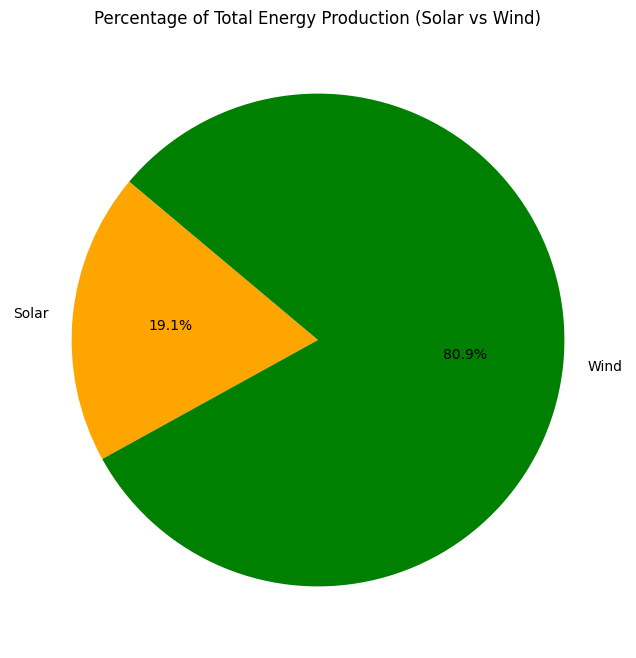

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming the DataFrame named df_cleaned is available and contains the cleaned data

# Summing up the total production for Solar and Wind across the entire dataset
total_production = df_cleaned.groupby('Source')['Production'].sum()

# Displaying the total production for Solar and Wind
print("Total energy production:")
print(total_production)

# Calculating the overall total production
overall_total_production = total_production.sum()
print(f"\nOverall total energy production: {overall_total_production}")

# Defining labels and colors for the pie chart
labels = total_production.index
colors = ['orange', 'green']

# Plotting the pie chart
plt.figure(figsize=(8, 8))
plt.pie(total_production, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Percentage of Total Energy Production (Solar vs Wind)')
plt.show()

#**Annual Production Bar Plot**

In [34]:
# Calculating the annual production for each energy source
annual_production = df_cleaned.groupby(by=['Source', 'Year'])['Production'].sum().reset_index()

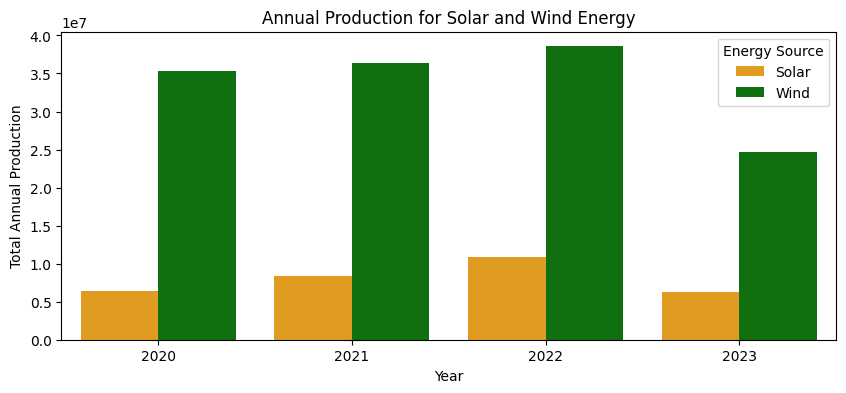

In [35]:
# Creating a bar plot to visualize the annual production for both solar and wind energy
plt.figure(figsize=(10, 4))
sns.barplot(data=annual_production, x='Year', y='Production', hue='Source', palette={'Solar': 'orange', 'Wind': 'green'})
plt.title('Annual Production for Solar and Wind Energy')
plt.xlabel('Year')
plt.ylabel('Total Annual Production')
plt.legend(title='Energy Source')
plt.show()

#**Correlation Analysis**

*   **Calculating Correlation Between Solar and Wind Energy Production**

In [11]:
# Aggregate production by date and source to ensure no duplicates
aggregated_data = df_cleaned.groupby(['Date', 'Source'])['Production'].sum().reset_index()

# Pivot data to get Solar and Wind production in separate columns
pivot_data = aggregated_data.pivot(index='Date', columns='Source', values='Production').reset_index()

# Calculating correlation between solar and wind energy production
correlation = pivot_data['Solar'].corr(pivot_data['Wind'])
print(f"Correlation between Solar and Wind production: {correlation}")

Correlation between Solar and Wind production: -0.3561911250310251


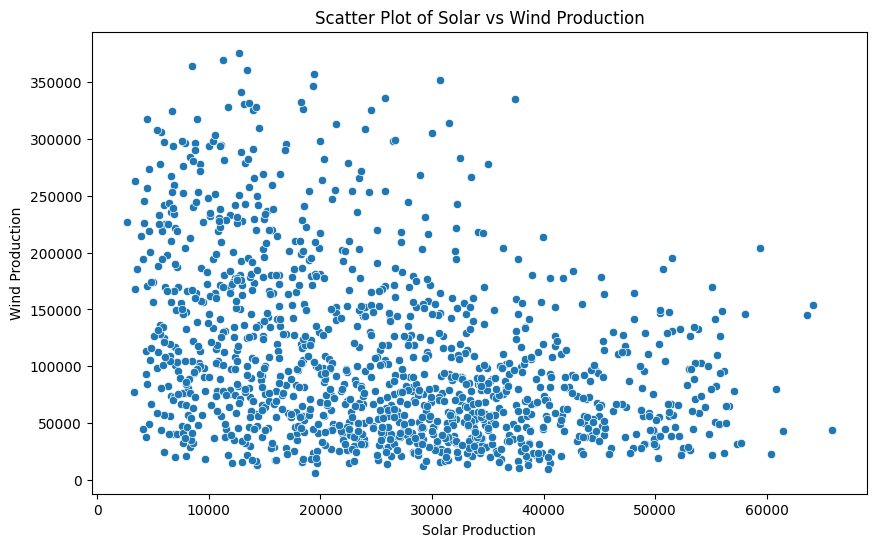

In [15]:
# Plotting the scatter plot to visualize the correlation
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Solar', y='Wind', data=pivot_data)
plt.title('Scatter Plot of Solar vs Wind Production')
plt.xlabel('Solar Production')
plt.ylabel('Wind Production')
plt.show()


#**Plotting the Correlation Matrix Heatmap**

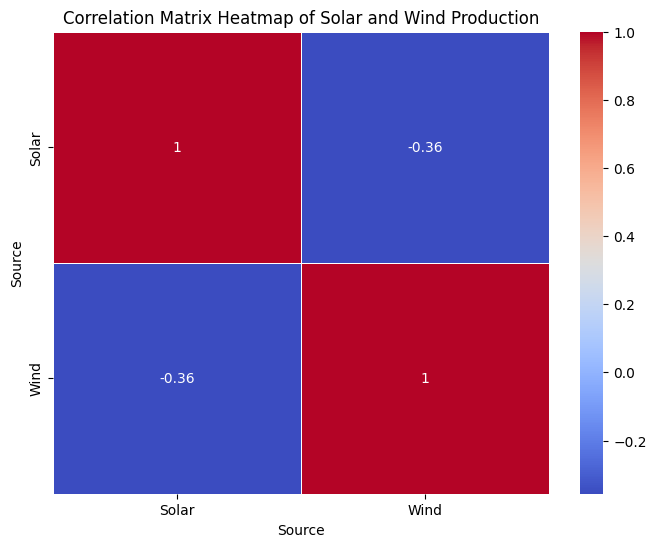

In [17]:
# Calculating the correlation matrix for Solar and Wind production
correlation_matrix = pivot_data[['Solar', 'Wind']].corr()

# Plotting the correlation matrix heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, linecolor='white')
plt.title('Correlation Matrix Heatmap of Solar and Wind Production')
plt.show()


#**Outlier Analysis**

*   **Identifying and Analysing Outliers**

<ipython-input-18-2edb521b874e>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Source', y='Production', data=df_cleaned, palette=custom_palette)


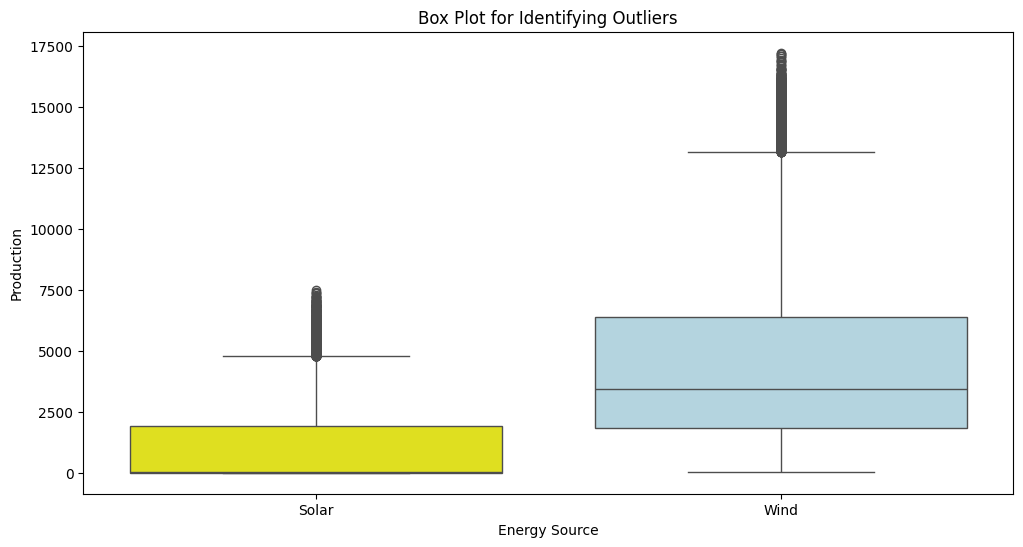

,Date and Hour,Date,StartHour,EndHour,Source,Production,dayOfYear,dayName,monthName,Month,Year
224,2020-01-09 07:00:00+01:00,2020-01-09,07:00:00,08:00:00,Wind,9902.0,9,Thursday,January,1,2020
227,2020-01-09 11:00:00+01:00,2020-01-09,11:00:00,12:00:00,Wind,10329.0,9,Thursday,January,1,2020
230,2020-01-09 13:00:00+01:00,2020-01-09,13:00:00,14:00:00,Wind,10074.0,9,Thursday,January,1,2020
233,2020-01-09 16:00:00+01:00,2020-01-09,16:00:00,17:00:00,Wind,10111.0,9,Thursday,January,1,2020
236,2020-01-09 18:00:00+01:00,2020-01-09,18:00:00,19:00:00,Wind,10757.0,9,Thursday,January,1,2020
...,...,...,...,...,...,...,...,...,...,...,...
57775,2023-05-04 01:00:00+02:00,2023-05-04,01:00:00,02:00:00,Wind,9904.0,124,Thursday,May,5,2023
57917,2023-05-29 18:00:00+02:00,2023-05-29,18:00:00,19:00:00,Wind,11181.0,149,Monday,May,5,2023
57918,2023-05-29 21:00:00+02:00,2023-05-29,21:00:00,22:00:00,Wind,10887.0,149,Monday,May,5,2023
58200,2023-05-29 23:00:00+02:00,2023-05-29,23:00:00,24:00:00,Wind,10408.0,149,Monday,May,5,2023


In [18]:
# Creating a box plot to identify outliers with specified colors for Solar and Wind
plt.figure(figsize=(12, 6))

# Custom palette with yellow for Solar and light blue for Wind
custom_palette = {'Solar': 'yellow', 'Wind': 'lightblue'}

sns.boxplot(x='Source', y='Production', data=df_cleaned, palette=custom_palette)
plt.title('Box Plot for Identifying Outliers')
plt.xlabel('Energy Source')
plt.ylabel('Production')
plt.show()

# Displaying outliers
outliers = df_cleaned[(df_cleaned['Production'] > df_cleaned['Production'].quantile(0.95)) | (df_cleaned['Production'] < df_cleaned['Production'].quantile(0.05))]
outliers

#**Seasonal Distribution Analysis**

*   **Creating a Bar Plot for Seasonal Production Distribution**

<ipython-input-22-8cfe9614f09f>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Season'] = df_cleaned['Date'].apply(get_season)
<ipython-input-22-8cfe9614f09f>:24: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Season', y='Production', hue='Source', data=seasonal_production, ci=None, palette=custom_palette)


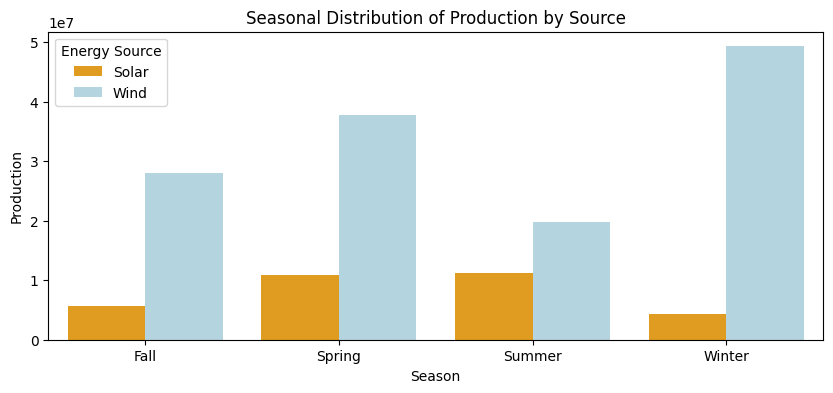

In [22]:
# Function to determine the season based on the month
def get_season(date):
    month = date.month
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    elif month in [9, 10, 11]:
        return 'Fall'

# Assuming 'Date' is a datetime column in df_cleaned
df_cleaned['Season'] = df_cleaned['Date'].apply(get_season)

# Now we can group by Season and Source
seasonal_production = df_cleaned.groupby(['Season', 'Source'])['Production'].sum().reset_index()

plt.figure(figsize=(10, 4))

# Custom palette with orange for Solar and light blue for Wind
custom_palette = {'Solar': 'orange', 'Wind': 'lightblue'}

sns.barplot(x='Season', y='Production', hue='Source', data=seasonal_production, ci=None, palette=custom_palette)
plt.title('Seasonal Distribution of Production by Source')
plt.xlabel('Season')
plt.ylabel('Production')
plt.legend(title='Energy Source')
plt.show()


#**Seasonal Analysis**

*   **Creating Seasonal Box Plot**

<ipython-input-33-4ea6b2f0caf3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Season'] = df_cleaned['Date'].dt.month % 12 // 3 + 1
<ipython-input-33-4ea6b2f0caf3>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Season'] = df_cleaned['Season'].map({1: 'Winter', 2: 'Spring', 3: 'Summer', 4: 'Autumn'})


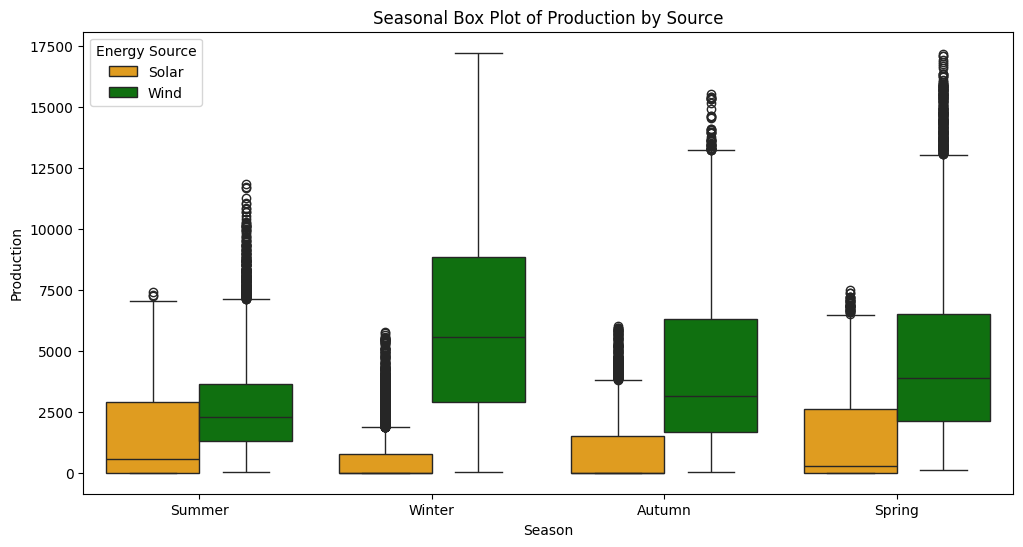

In [33]:
# Adding a 'Season' column
df_cleaned['Season'] = df_cleaned['Date'].dt.month % 12 // 3 + 1
df_cleaned['Season'] = df_cleaned['Season'].map({1: 'Winter', 2: 'Spring', 3: 'Summer', 4: 'Autumn'})

# Creating a box plot for seasonal production with specified colors
plt.figure(figsize=(12, 6))
sns.boxplot(x='Season', y='Production', hue='Source', data=df_cleaned, palette={'Solar': 'orange', 'Wind': 'green'})
plt.title('Seasonal Box Plot of Production by Source')
plt.xlabel('Season')
plt.ylabel('Production')
plt.legend(title='Energy Source')
plt.show()

#**Calculating Monthly Production Variability**

In [23]:
# Calculating monthly production variability (standard deviation)
monthly_variability = df_cleaned.groupby(['Year', 'Month', 'Source'])['Production'].std().reset_index()

# Creating a 'Date' column for plotting purposes
monthly_variability['Date'] = pd.to_datetime(monthly_variability[['Year', 'Month']].assign(Day=1))

# Displaying the first few rows of the calculated monthly variability
print("Monthly production variability (standard deviation):")
print(monthly_variability.head())

Monthly production variability (standard deviation):
   Year  Month Source   Production       Date
0  2020      1  Solar   581.467905 2020-01-01
1  2020      1   Wind  3334.707353 2020-01-01
2  2020      2  Solar   866.459585 2020-02-01
3  2020      2   Wind  3214.395595 2020-02-01
4  2020      4  Solar  1236.738296 2020-04-01


#**Plotting the Line Chart**

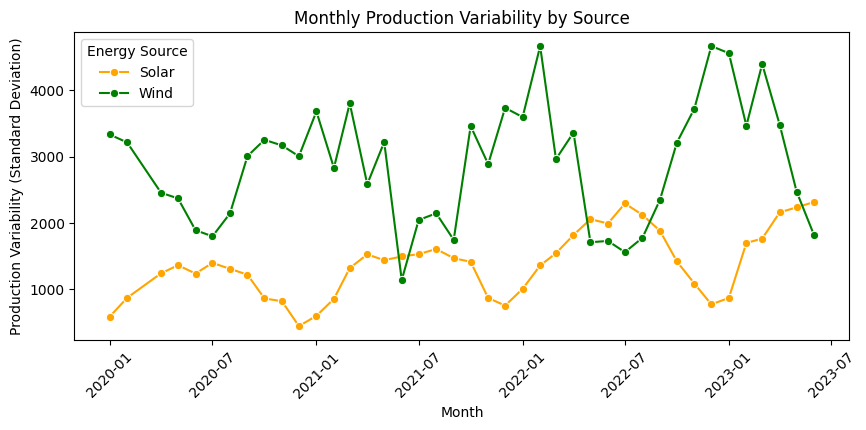

In [24]:
# Creating a line plot to show the monthly production variability with specified colours for Solar and Wind
plt.figure(figsize=(10, 4))

# Custom palette with yellow for Solar and light blue for Wind
custom_palette = {'Solar': 'orange', 'Wind': 'green'}

sns.lineplot(x='Date', y='Production', hue='Source', data=monthly_variability, palette=custom_palette, marker='o')
plt.title('Monthly Production Variability by Source')
plt.xlabel('Month')
plt.ylabel('Production Variability (Standard Deviation)')
plt.xticks(rotation=45)
plt.legend(title='Energy Source')
plt.show()

#**Plotting the Combined Monthly Production Chart**

In [25]:
# Calculating monthly total production for each energy source
monthly_production = df_cleaned.groupby(['Year', 'Month', 'Source'])['Production'].sum().reset_index()

# Pivoting the data to have separate columns for Solar and Wind
monthly_production_pivot = monthly_production.pivot_table(index=['Year', 'Month'], columns='Source', values='Production').reset_index()

# Creating a 'Date' column for plotting purposes
monthly_production_pivot['Date'] = pd.to_datetime(monthly_production_pivot[['Year', 'Month']].assign(Day=1))

# Calculating Total Production
monthly_production_pivot['Total'] = monthly_production_pivot['Solar'] + monthly_production_pivot['Wind']

# Displaying the first few rows of the calculated monthly production
print("Monthly production with Solar, Wind, and Total:")
print(monthly_production_pivot.head())


Monthly production with Solar, Wind, and Total:
Source  Year  Month     Solar       Wind       Date      Total
0       2020      1  256806.0  4181498.0 2020-01-01  4438304.0
1       2020      2  391312.0  5898259.0 2020-02-01  6289571.0
2       2020      4  698193.0  2284877.0 2020-04-01  2983070.0
3       2020      5  847213.0  2678640.0 2020-05-01  3525853.0
4       2020      6  800086.0  2050197.0 2020-06-01  2850283.0


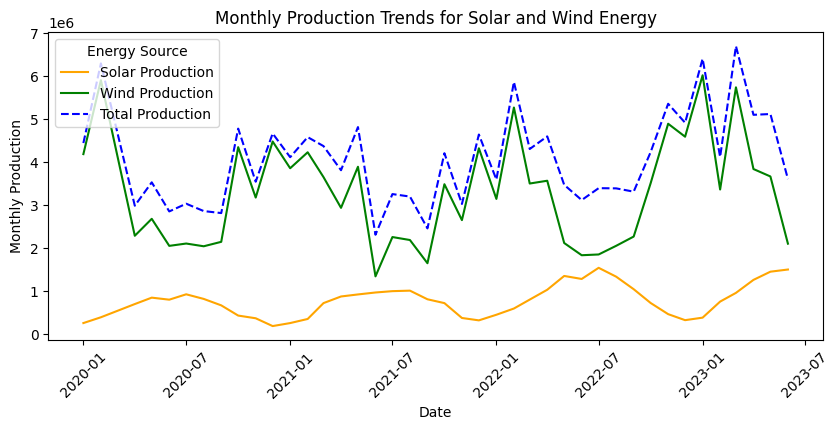

In [27]:
# Plotting the combined monthly production chart
plt.figure(figsize=(10, 4))

# Plotting Solar Production
sns.lineplot(x='Date', y='Solar', data=monthly_production_pivot, color='orange', label='Solar Production')

# Plotting Wind Production
sns.lineplot(x='Date', y='Wind', data=monthly_production_pivot, color='green', label='Wind Production')

# Plotting Total Production
sns.lineplot(x='Date', y='Total', data=monthly_production_pivot, color='blue', label='Total Production', linestyle='--')

plt.title('Monthly Production Trends for Solar and Wind Energy')
plt.xlabel('Date')
plt.ylabel('Monthly Production')
plt.xticks(rotation=45)
plt.legend(title='Energy Source')
plt.show()

#**Monthly Average Production Bar Plot**

In [28]:
# Calculating the monthly average production for each energy source
monthly_avg_production = df_cleaned.groupby(['Year', 'Month', 'Source'])['Production'].mean().reset_index()

NameError: name 'np' is not defined

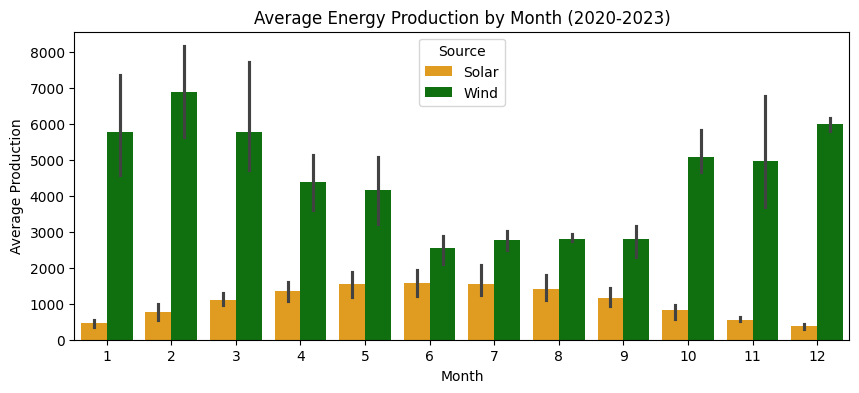

In [30]:
# Define the months as labels
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

# Creating the bar plot
fig, ax = plt.subplots(figsize=(10, 4))

# Plotting the bar plot with specified colors
sns.barplot(data=monthly_avg_production, x='Month', y='Production', hue='Source', palette={'Solar': 'orange', 'Wind': 'green'})

# Adding labels and title
plt.xlabel('Month')
plt.ylabel('Average Production')
plt.title('Average Energy Production by Month (2020-2023)')
plt.xticks(np.arange(12), labels=months)
plt.legend(title='Energy Source')

# Displaying the plot
plt.show()

#**Monthly Distribution Pie Charts**

In [31]:
# Defining month order for sorting
month_order = {"January": 1, "February": 2, "March": 3, "April": 4, "May": 5, "June": 6, "July": 7,
               "August": 8, "September": 9, "October": 10, "November": 11, "December": 12}

# Calculating monthly production for each year and source
year_month_production = df_cleaned.groupby(by=["Source", "Year", "monthName"]).Production.sum().reset_index()

# Sorting values based on the months
year_month_production['monthOrder'] = year_month_production['monthName'].map(month_order)
year_month_production = year_month_production.sort_values(by=["Year", "monthOrder"])

# Extracting unique years
years = sorted(year_month_production.Year.unique())


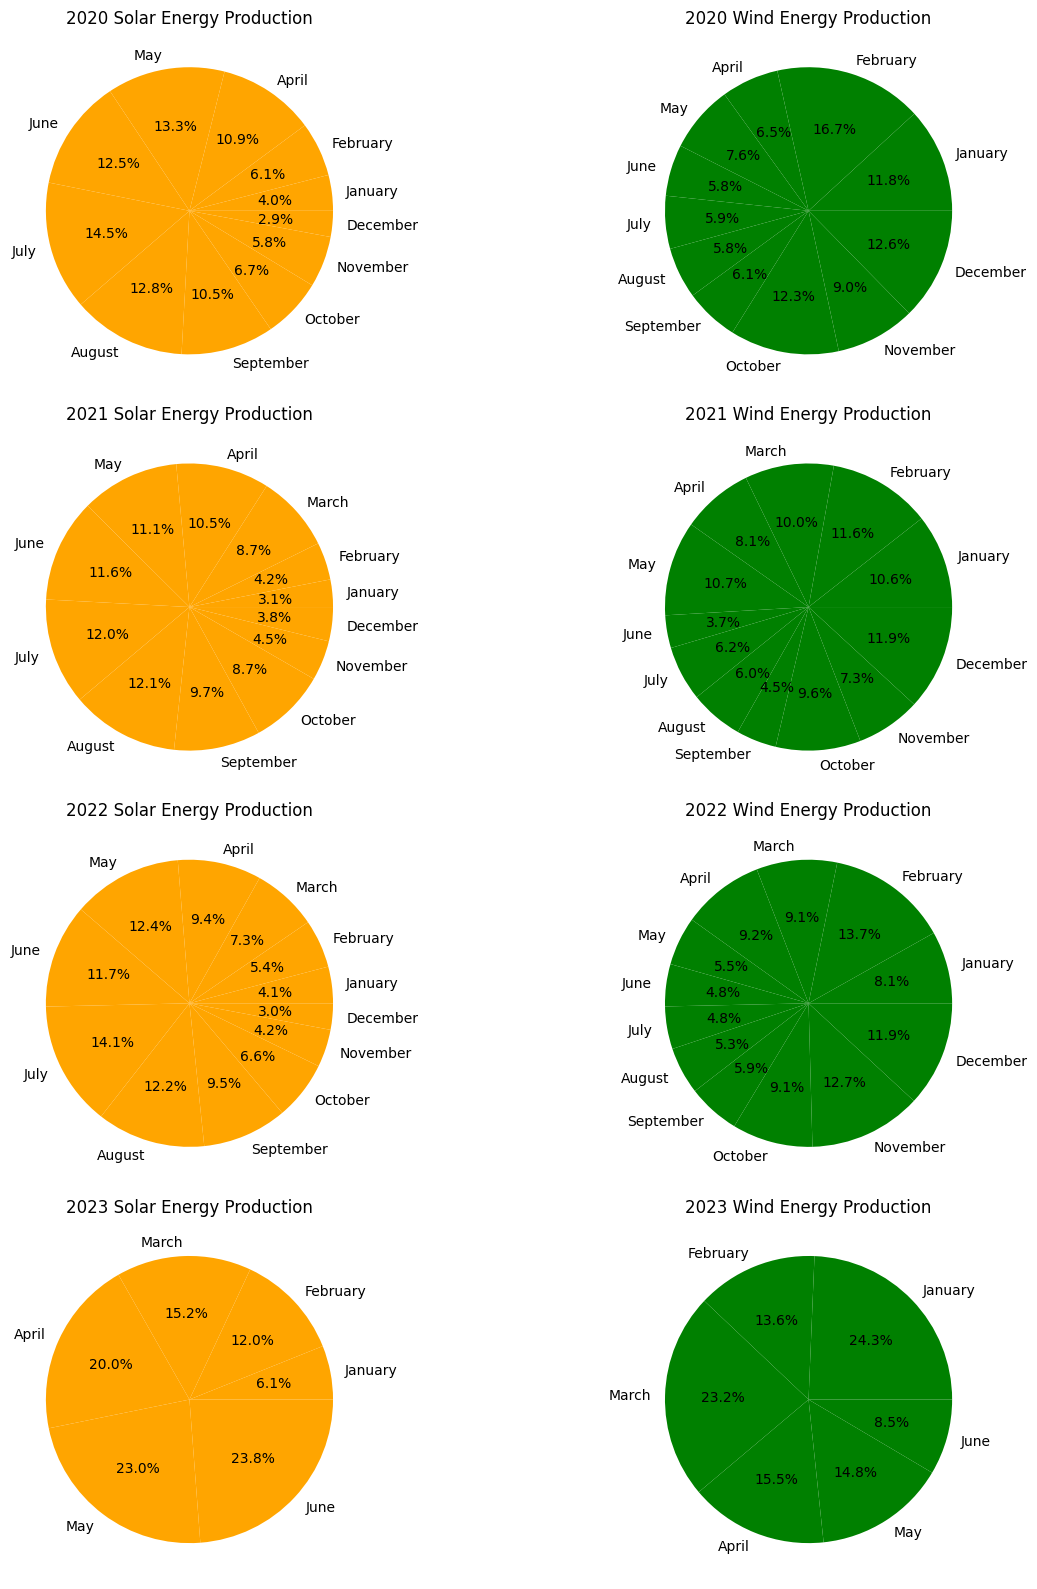

In [32]:
# Creating pie charts for each year and energy source
plt.figure(figsize=(14, 16))

for i, year in enumerate(years):
    # Extracting months for the current year
    months = year_month_production[year_month_production.Year == year].monthName.unique()

    # Solar Production Pie Chart
    plt.subplot(len(years), 2, i*2 + 1)
    solar_data = year_month_production[(year_month_production.Year == year) & (year_month_production.Source == "Solar")]
    plt.pie(solar_data.Production, labels=months, autopct='%1.1f%%', colors=['orange']*len(months))
    plt.title(f"{year} Solar Energy Production")

    # Wind Production Pie Chart
    plt.subplot(len(years), 2, i*2 + 2)
    wind_data = year_month_production[(year_month_production.Year == year) & (year_month_production.Source == "Wind")]
    plt.pie(wind_data.Production, labels=months, autopct='%1.1f%%', colors=['green']*len(months))
    plt.title(f"{year} Wind Energy Production")

plt.tight_layout()
plt.show()

#**Dual Axis Chart**

*   **This will allow detailed comparison of the trends of solar and wind production.**

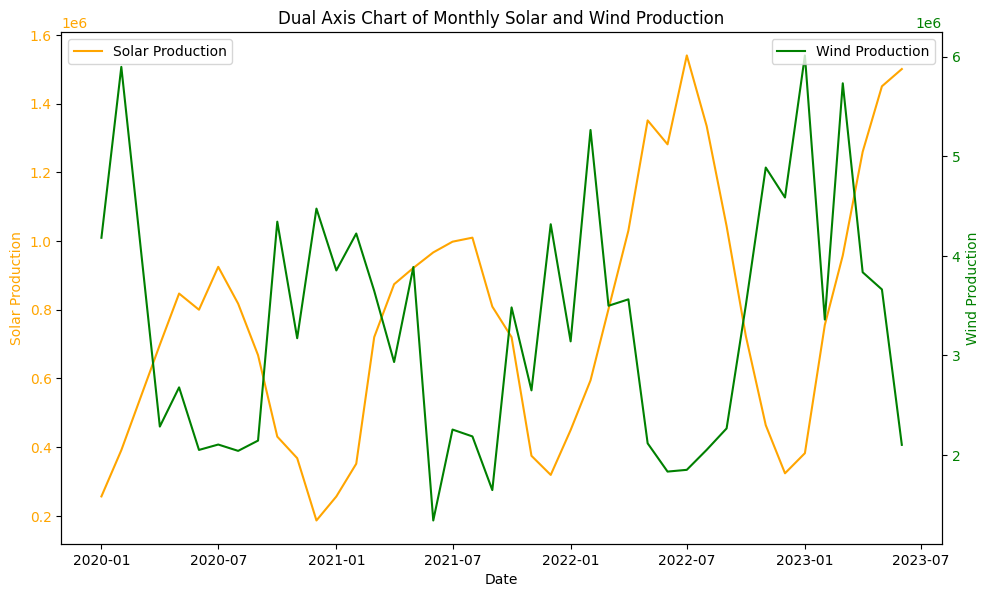

In [59]:
# Plotting the dual axis chart
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plotting Solar Production
color = 'orange'
ax1.set_xlabel('Date')
ax1.set_ylabel('Solar Production', color=color)
ax1.plot(monthly_production_pivot['Date'], monthly_production_pivot['Solar'], color=color, label='Solar Production')
ax1.tick_params(axis='y', labelcolor=color)
ax1.legend(loc='upper left')

# Creating a second y-axis for Wind Production
ax2 = ax1.twinx()
color = 'green'
ax2.set_ylabel('Wind Production', color=color)
ax2.plot(monthly_production_pivot['Date'], monthly_production_pivot['Wind'], color=color, label='Wind Production')
ax2.tick_params(axis='y', labelcolor=color)
ax2.legend(loc='upper right')

fig.tight_layout()
plt.title('Dual Axis Chart of Monthly Solar and Wind Production')
plt.show()


#**Daily Average Production Line Plot**

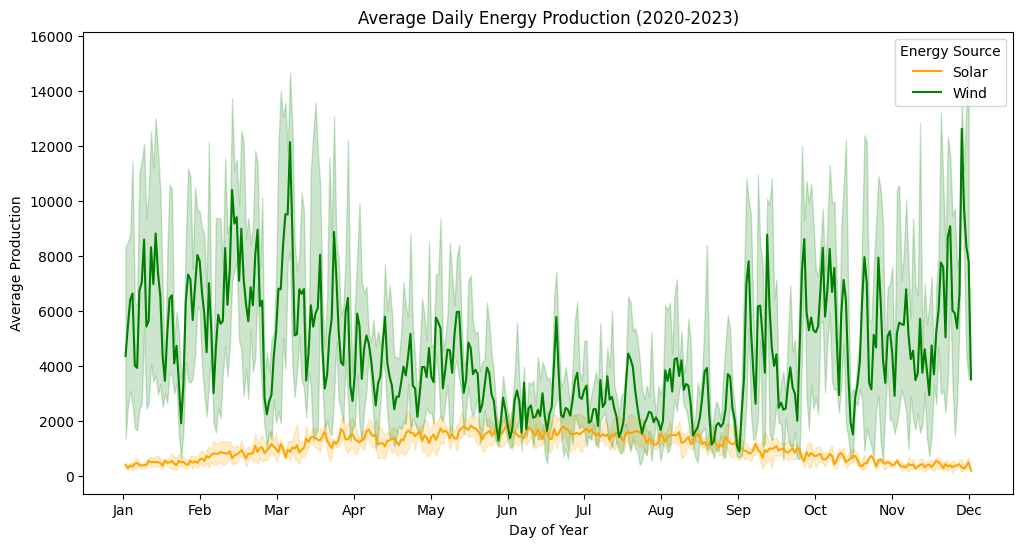

In [43]:
# Calculating the daily average production for each energy source
daily_avg_production = df_cleaned.groupby(['Year', 'dayOfYear', 'Source'])['Production'].mean().reset_index()

# Define the months as labels
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

# Creating the line plot
fig, ax = plt.subplots(figsize=(12,6))

# Plotting the line plot with specified colors
sns.lineplot(data=daily_avg_production, x='dayOfYear', y='Production', hue='Source', palette={'Solar': 'orange', 'Wind': 'green'})

# Adding labels and title
plt.xlabel('Day of Year')
plt.ylabel('Average Production')
plt.title('Average Daily Energy Production (2020-2023)')
plt.xticks(np.linspace(0, 365, 12), labels=months)  # Adjusted to 365 days for a full year
plt.legend(title='Energy Source')

# Displaying the plot
plt.show()




#**Creating the Stacked Area Chart**

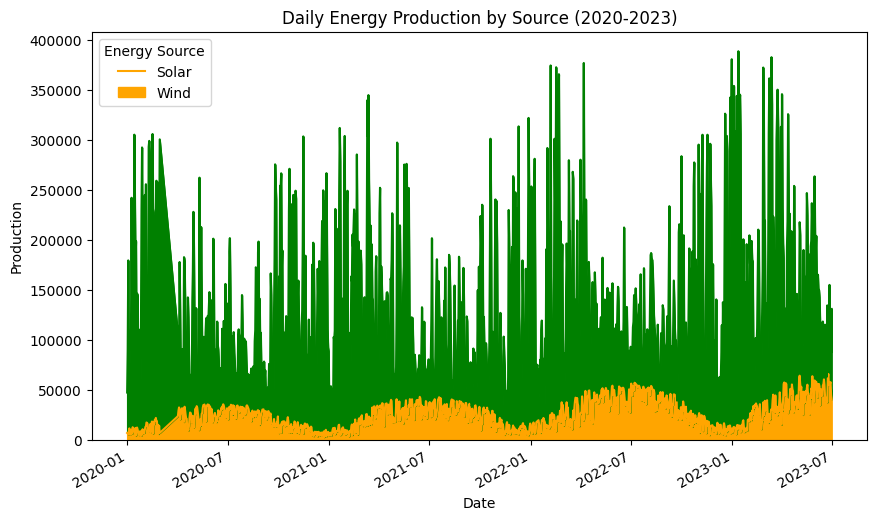

In [56]:
# Assuming df_cleaned is your original DataFrame
# Re-create the aggregated data
aggregated_data = df_cleaned.groupby(['Date', 'Source'])['Production'].sum().reset_index()

# Pivot data to get Solar and Wind production in separate columns, keeping 'Date'
pivot_data = aggregated_data.pivot(index='Date', columns='Source', values='Production').reset_index()

# Create the stacked area chart
fig, ax = plt.subplots(figsize=(10, 6))

# Plotting the stacked area chart with specified colors
pivot_data.set_index('Date').plot.area(ax=ax, stacked=True, color=['orange', 'green'])

# Adding labels and title
ax.set_xlabel('Date')
ax.set_ylabel('Production')
ax.set_title('Daily Energy Production by Source (2020-2023)')
ax.legend(['Solar', 'Wind'], title='Energy Source')

# Displaying the plot
plt.show()


#**Hourly Average Production Line Plot**

<ipython-input-57-977ceab16b86>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Hour'] = pd.to_datetime(df_cleaned['StartHour'], format='%H:%M:%S').dt.hour


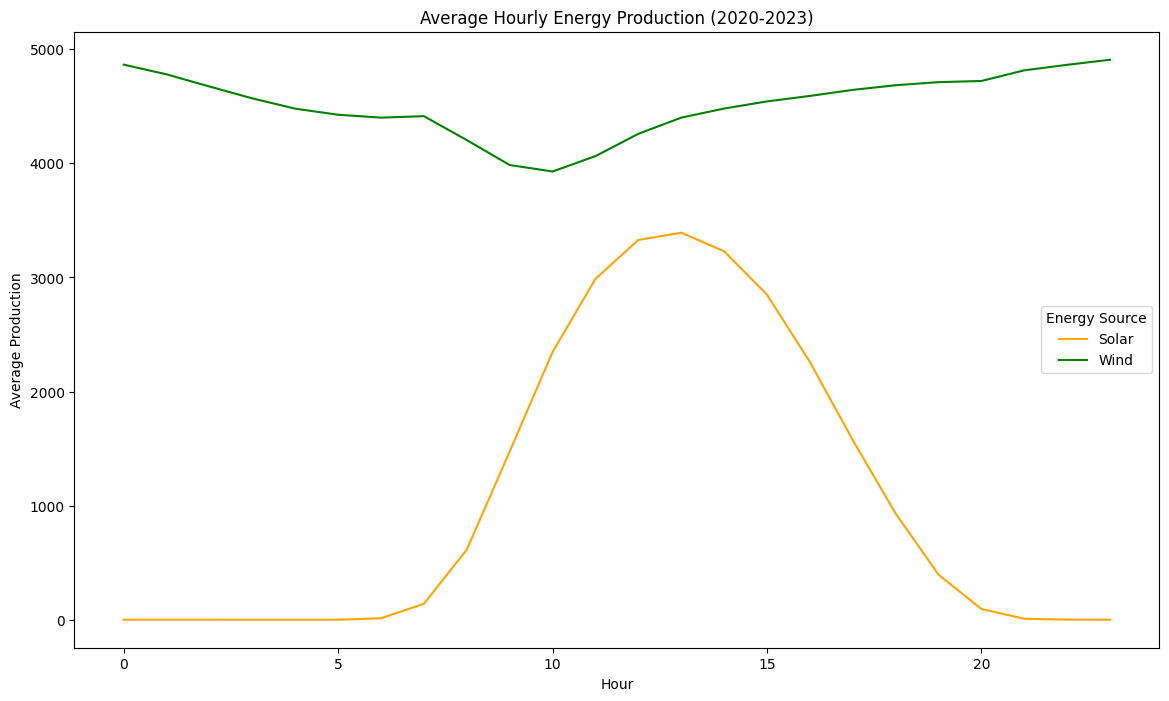

In [57]:
# Converting 'StartHour' to datetime format and extracting the hour
df_cleaned['Hour'] = pd.to_datetime(df_cleaned['StartHour'], format='%H:%M:%S').dt.hour

# Calculating the hourly average production for each energy source
hourly_avg_production = df_cleaned.groupby(['Hour', 'Source'])['Production'].mean().reset_index()

# Creating the line plot
fig, ax = plt.subplots(figsize=(14, 8))

# Plotting the line plot with specified colors
sns.lineplot(data=hourly_avg_production, x='Hour', y='Production', hue='Source', palette={'Solar': 'orange', 'Wind': 'green'})

# Adding labels and title
plt.xlabel('Hour')
plt.ylabel('Average Production')
plt.title('Average Hourly Energy Production (2020-2023)')
plt.legend(title='Energy Source')

# Displaying the plot
plt.show()